In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files

uploaded = files.upload()

Saving snappfood.zip to snappfood.zip


In [6]:
train_df = pd.read_csv('train.csv',sep='\t')
dev_df = pd.read_csv('dev.csv',sep='\t')
test_df = pd.read_csv('test.csv',sep='\t')

In [ ]:
df = pd.concat([train_df, dev_df, test_df]  ,ignore_index=True )
df.shape

(70000, 4)

In [8]:
df = pd.concat([train_df, dev_df, test_df]  ,ignore_index=True )
print("Columns in the DataFrame:")
print(df.columns)

Columns in the DataFrame:
Index(['Unnamed: 0', 'comment', 'label', 'label_id'], dtype='object')


#clean data

In [9]:
df=df.rename(columns={'Unnamed: 0':'f'})
df['f']= df['f'].astype('str')
df_need_clean= df[df['f']!='nan']
df_no_need_clean= df.drop(df_need_clean.index).drop(['f'],axis=1)

In [11]:
df_1= df_need_clean.rename(columns={'f':'comment','comment':'label','label':'label_id','label_id':'noneed'}).drop(['noneed'],axis=1)

In [12]:
df=pd.concat([df_no_need_clean,df_1],axis=0).reset_index().drop(['index'],axis=1)
df.head()

,comment,label,label_id
0,0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD
1,1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY
2,2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD
3,3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY
4,4,شیرینی وانیلی فقط یک مدل بود.,HAPPY


In [13]:
df.isna().sum()

comment     0
label       0
label_id    0
dtype: int64

#describe

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comment   70000 non-null  object
 1   label     70000 non-null  object
 2   label_id  70000 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


In [19]:
df['label_id']=df['label_id'].astype('str')
df['label']=df['label'].astype('str')
df['comment']=df['comment'].astype('str')

In [16]:
df['label'].value_counts()

واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح                                                                                                                                                                                                                            1
عالی بود هم به موقع رسید هم خیلی خوشمزه و تمیز بود                                                                                                                                                                                                                         1
خیلی زمان برد تا سفارش رسید                                                                                                                                                                                                                                                1
سوپرمارکت خورشید همیشه همه چیز رو تاریخ روز و تازه میفرسته و خیلی‌خیلی ازش راضی‌ام                                                                                                               

In [20]:
df["count"]=df["comment"].apply(len)
df.head()

,comment,label,label_id,count
0,0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1
1,1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,1
2,2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1
3,3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,1
4,4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,1


# Visualization

<ipython-input-21-1aedc0d2ccf5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["count"],bins=150)


<Axes: xlabel='count', ylabel='Density'>

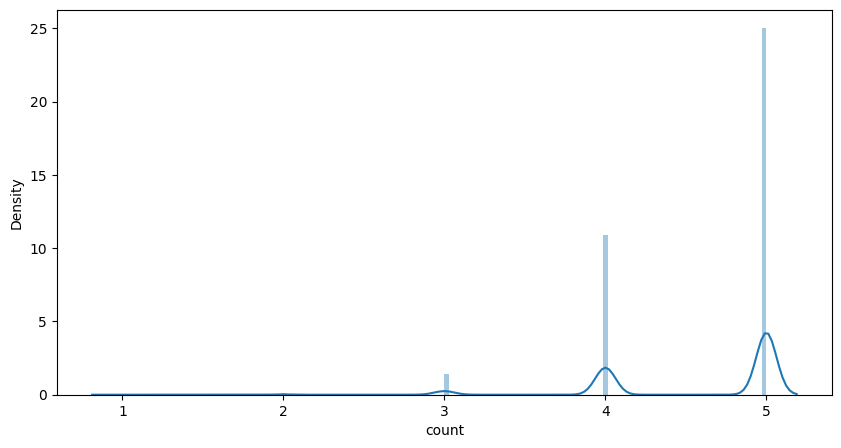

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(df["count"],bins=150)

# preprocessing

In [22]:
!pip install hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 39.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 32.1 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9296 sha256=457350aad63a0dd28319895e088e3628c16bc210b0fc324fbeb60e638e4d88e4
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This

In [23]:
pip install finglish

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 11.0 MB/s eta 0:00:00


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import hazm
from finglish import f2p
import re

Loading converters...
Loading persian word list...
Loading dictionary...


In [25]:
hazm_normalizer=hazm.Normalizer()

In [26]:
def fixing(x):
    x = x.replace('\u200c', '').replace('\xa0','').replace('\r\n',' ').replace('|',' ')
    return x

In [29]:
with open('kharazi_stopwords.txt','r',encoding='UTF-8') as file:
    stop_words=file.read().split('\n')
stop_words=[i.replace('\u200f','') for i in stop_words]

In [30]:
def text_cleaner(text):
    try:
        text = re.sub(r"\{\}\؛\*\=\-\+\/\n]"," ",str(text))
        text = re.sub("[ ]+"," ",text)
        text = re.sub("\!+","!",text)
        text = re.sub("[؟]+","؟",text)
        text = re.sub("\?+","?",text)
        text = re.sub("[.]+","",text)
        text = re.sub("[،]+","",text)
        if(bool(re.match('^[a-zA-Z]',text))==True):
            text=f2p(text)
        for c in "..آابپتثجچحخدذرزژسشصضطظعغفقکگلمنوهیئ":
            text = re.sub(f"[{c}]+", c, text)
        text = fixing(hazm_normalizer.normalize(text))
        sent=[]
        sent.append(text)
        return sent
    except:
        return np.nan
#     words = []
#     print(w)
#     if w not in stop_words:
#         words.append(w)
#     words.append(hazm.word_tokenize(text))

#     return words

In [42]:
hazm_lemma=hazm.Lemmatizer()
def tokenize(sent):
#     clean=[word for word in "".join(words).split() if word not in stop_words]
    token=[hazm.word_tokenize(s) for s in sent]
    clean=[t for t in token if t not in stop_words]
    done=[hazm_lemma.lemmatize(c) for c in clean[0]]
    return (done)

In [31]:
x=df['comment'].apply(text_cleaner)
y=df['label_id']

train & test split

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=101)

In [34]:
x_train.shape

(49000,)

# count vectorizer

In [35]:
cv=CountVectorizer(analyzer=tokenize).fit(x_train)

In [36]:
train_comment_cv=cv.transform(x_train)

In [41]:
train_comment_cv.shape

(49000, 41516)

In [40]:
print(len(cv.vocabulary_))

41516


In [43]:
train_comment_cv.nnz

49000

In [44]:
sparsity=(100*train_comment_cv.nnz/(train_comment_cv.shape[0]*train_comment_cv.shape[1]))
round(sparsity,3)

0.002

# Tf_Idf

In [45]:
from sklearn.feature_extraction.text import TfidfTransformer

In [46]:
tfidf=TfidfTransformer().fit(train_comment_cv)

In [47]:
train_comment_tfidf=tfidf.transform(train_comment_cv)

In [48]:
train_comment_tfidf.shape

(49000, 41516)

# Random forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model=RandomForestClassifier(n_estimators=90).fit(train_comment_tfidf,y_train)

In [51]:
prediction=model.predict(tfidf.transform(cv.transform(x_test)))

In [52]:
from sklearn.metrics import classification_report ,confusion_matrix

In [53]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

       HAPPY       0.50      0.88      0.63     10448
         SAD       0.50      0.12      0.19     10552

    accuracy                           0.50     21000
   macro avg       0.50      0.50      0.41     21000
weighted avg       0.50      0.50      0.41     21000

[[9177 1271]
 [9296 1256]]


# Naive Bayes

In [54]:
from sklearn.naive_bayes import MultinomialNB

In [55]:
nb=MultinomialNB().fit(train_comment_tfidf,y_train)

In [56]:
prediction=nb.predict(tfidf.transform(cv.transform(x_test)))

In [58]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

       HAPPY       0.50      0.90      0.64     10448
         SAD       0.50      0.10      0.16     10552

    accuracy                           0.50     21000
   macro avg       0.50      0.50      0.40     21000
weighted avg       0.50      0.50      0.40     21000

[[9419 1029]
 [9530 1022]]


# RNN

In [59]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout, Dense,Embedding,LSTM,SpatialDropout1D
from keras.utils import to_categorical

In [60]:
embedding_dim=32
lstm_output=50
max_features=32
model=Sequential()
model.add(Embedding(max_features, embedding_dim,input_length=train_comment_cv.shape[1]))
model.add(LSTM(lstm_output,dropout=.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 41516, 32)         1024      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 17675 (69.04 KB)
Trainable params: 17675 (69.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [64]:
y_train = np.asarray(y_train).reshape((-1,1))
y_test = np.asarray(y_test).reshape((-1,1))

In [ ]:
es=EarlyStopping(monitor='val_loss',patience=2)
batch_size=128
history=model.fit(train_comment_cv,y_train,epochs=2, batch_size=batch_size,validation_data=(cv.transform(x_test),y_test),verbose=1,callbacks=[es])

In [66]:
from sklearn.metrics import accuracy_score
prediction=model.predict(cv.transform(x_test))
y_prediction=np.argmax(prediction,axis=1)
y_true=np.argmax(y_test,axis=1)
accuracy_score(y_true,y_prediction)

657/657 [==============================] - 273s 414ms/step


1.0

In [67]:
print(classification_report(y_true,y_prediction))
print(confusion_matrix(y_true,y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21000

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000

[[21000]]
